In [234]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from scipy.stats import skew


In [235]:
df=pd.read_csv('train.csv')

df_test=pd.read_csv('test.csv')

In [236]:

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


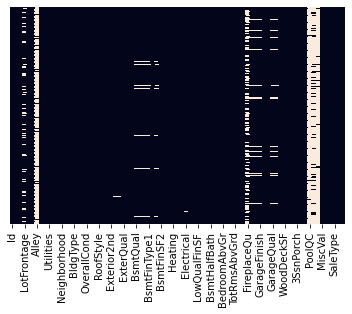

In [237]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

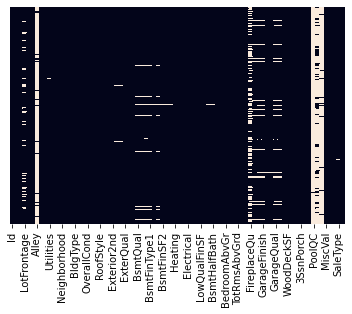

In [238]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [239]:
df['MSZoning'].value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [240]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df['LotFrontage'].mean())

In [241]:
df.drop(['Alley'],axis=1,inplace=True)
df_test.drop(['Alley'],axis=1,inplace=True)

In [242]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

In [243]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [244]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

df_test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [245]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

In [246]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)


df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [247]:
list1 = df_test['Id'].tolist()

df.drop(['Id'],axis=1,inplace=True)

df_test.drop(['Id'],axis=1,inplace=True)

In [248]:

df_test.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64

In [249]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])


df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

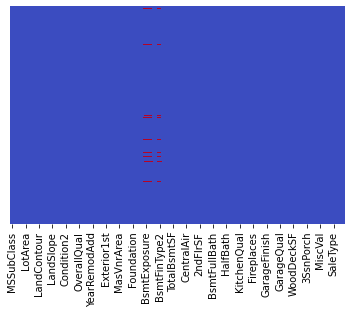

In [250]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [251]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

In [252]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['MSZoning']=df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['SaleType']= df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['HalfBath']=df_test['HalfBath'].fillna(df_test['HalfBath'].mode()[0])
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])

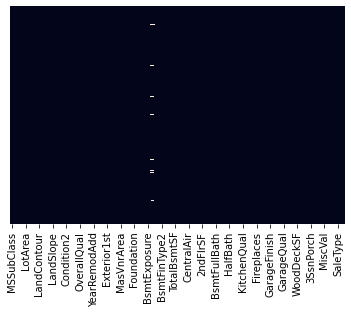

In [253]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [254]:
df_test['Utilities']=df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st']=df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])

df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mode()[0])
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode()[0])
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mode()[0])
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mode()[0])
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional']=df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['GarageCars']=df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0])
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mode()[0])

Text(0.5, 1.0, 'Percentage of missing values per feature')

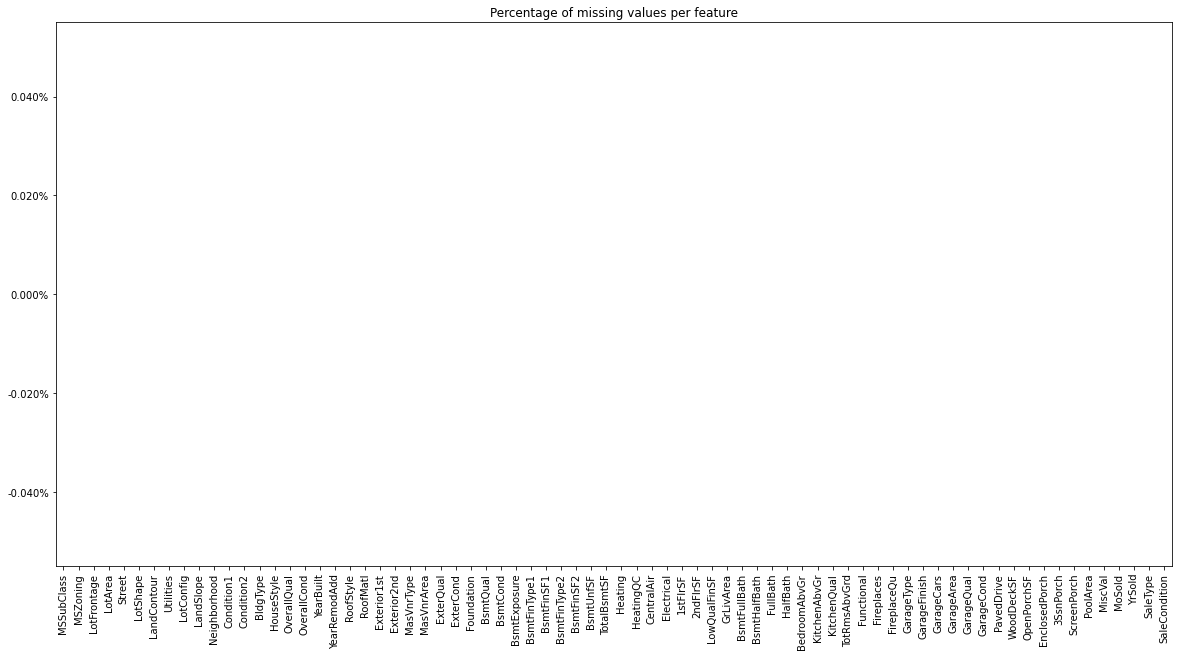

In [255]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

df.isna().sum()

plt.figure(figsize = (20,10)) 
ax = (df_test.isnull().mean() * 100).plot(kind='bar', color ='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of missing values per feature')

In [256]:
df.head

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotCon

In [257]:
categorical_features_train = df.select_dtypes(include=["object"]).columns.values
categorical_features_train


categorical_features_test = df_test.select_dtypes(include=["object"]).columns.values
categorical_features_test

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [258]:
def get_var_dtype_list(df):
    cat_cols = []
    num_cols = []

    for col in df.columns:
        if df[col].dtypes == 'object':
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return (cat_cols, num_cols)

In [259]:
Y = df['SalePrice']
df=df.drop('SalePrice', axis=1)

In [260]:
cat_cols_train, num_cols_train = get_var_dtype_list(df)

In [261]:
cat_cols_test, num_cols_test = get_var_dtype_list(df_test)

In [262]:
result = pd.concat([df,df_test],axis=0)
result.shape
cat_cols_train, num_cols_train = get_var_dtype_list(result)
result = pd.get_dummies(result, drop_first=True, columns=cat_cols_train)
result.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [263]:
def get_missing_stats(df, col_list, threshold=0):
    total = len(df)
    for col in col_list:
        null = df[col].isnull().sum()
        if null > 0 and null/total >= threshold:
            print(col)
            if df[col].dtypes == 'object':
                print(df[col].value_counts())
            print(f'Missing values: {null} of {total}')
            print(f'Percent missing values: {round((null*100)/total, 2)}%\n')

In [264]:
len(cat_cols_test)

39

In [265]:
df = result[:1460]
df_test = result[-1460:]


In [266]:
scaler = StandardScaler()
df[num_cols_train] = scaler.fit_transform(df[num_cols_train])
df_test[num_cols_test] = scaler.transform(df_test[num_cols_test])

<ipython-input-266-e6dd9bd4b231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols_train] = scaler.fit_transform(df[num_cols_train])
C:\Users\kshit\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-266-e6dd9bd4b231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [267]:
df.shape

(1460, 235)

In [279]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1459,-0.872563,0.224833,-0.058112,-0.795151,0.381743,-0.207594,-0.962566,-0.570750,0.847389,1.509640,...,0,0,0,0,1,0,0,0,1,0
0,-0.872563,0.451936,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,0.053428,0.604293,...,0,0,0,0,1,0,0,0,1,0
1,-0.872563,0.497357,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,1.051363,-0.288653,...,0,0,0,0,1,0,0,0,1,0
2,0.073375,0.179413,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,0.761852,-0.288653,...,0,0,0,0,1,0,0,0,1,0
3,0.073375,0.361095,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,0.347326,-0.288653,...,0,0,0,0,1,0,0,0,1,0


In [269]:

X = df
X_test = df_test

In [270]:
train_x, valid_x, train_y, valid_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [271]:
linear_regressor = LinearRegression()
linear_regressor.fit(train_x, train_y)
preds = linear_regressor.predict(valid_x)
mean_squared_error(preds,valid_y)

1.5848061533400135e+26

In [272]:
prediction = linear_regressor.predict(X_test)

In [273]:
list2 = prediction.tolist()
list2

[147700.48805631732,
 119242.20251266041,
 164903.13489171327,
 187068.60897311207,
 195598.82495617366,
 213894.5165823656,
 171400.05578196968,
 183436.52268037095,
 154866.4809972766,
 214920.87332255242,
 115768.29682608007,
 145326.3913810267,
 94397.63332842104,
 95041.45441094274,
 131192.83970719867,
 89228.2517414079,
 373036.7810850291,
 260051.1667333634,
 316905.9203223444,
 307346.7856682013,
 487165.3703601061,
 301059.8994074821,
 201285.7400222785,
 176100.59724822652,
 160626.14692330884,
 177035.78287598316,
 186376.45658464183,
 344355.84438354324,
 224154.6404397079,
 207046.58780801028,
 265242.269848209,
 194816.30535726936,
 106990.98153579526,
 204425.1065105548,
 328904.53168260213,
 292115.0464786148,
 253044.17262908898,
 175818.5912856965,
 162144.37225340225,
 157309.4677663379,
 143984.2361058098,
 196662.087424053,
 130157.86030149506,
 366754.64203927736,
 235778.61144474254,
 228629.9063802167,
 186227.987095422,
 259614.74979892478,
 199733.2402085513,

In [274]:
list_of_tuples = list(zip(list1,list2)) 
df_final = pd.DataFrame (list_of_tuples, columns = ['Id','SalePrice'])

In [275]:
df_final.to_csv('submission1.csv',index=False)

In [276]:

# fit model no training data
model = XGBClassifier()
model.fit(train_x, train_y)
# make predictions for test data
y_pred = model.predict(valid_x)



C:\Users\kshit\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [277]:
mean_squared_error(valid_y,preds)

1.5848061533400135e+26